# 插值演示

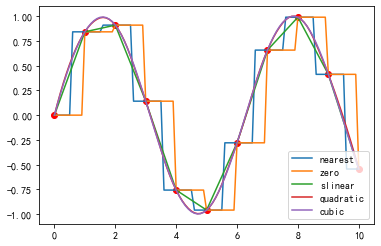

In [8]:
import numpy as np
from scipy import interpolate
import pylab as pl

x=np.linspace(0,10,11)
#x=[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
y=np.sin(x)
xnew=np.linspace(0,10,101)
pl.plot(x,y,"ro")
for kind in ["nearest","zero","slinear","quadratic","cubic"]:#插值方式
    #"nearest","zero"为阶梯插值
    #slinear 线性插值
    #"quadratic","cubic" 为2阶、3阶B样条曲线插值
    f=interpolate.interp1d(x,y,kind=kind)
    # ‘slinear’, ‘quadratic’ and ‘cubic’是指一阶、二阶或三阶样条插值
    ynew=f(xnew)
    pl.plot(xnew,ynew,label=str(kind))
pl.legend(loc="lower right")
pl.show()


15


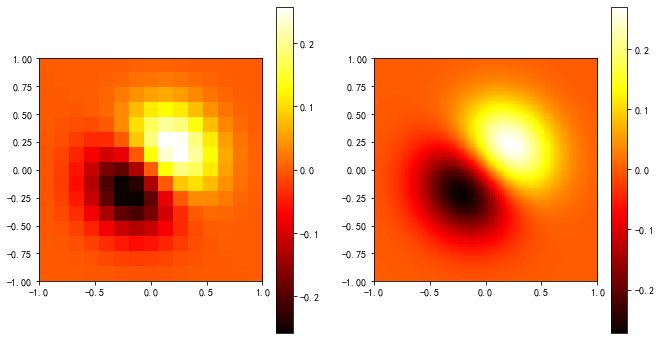

In [14]:
"""
演示二维插值。
"""
import numpy as np
from scipy import interpolate
import pylab as pl
import matplotlib as mpl

def func(x, y):
    return (x+y)*np.exp(-5.0*(x**2 + y**2))

# X-Y轴分为15*15的网格
y,x= np.mgrid[-1:1:15j, -1:1:15j]

fvals = func(x,y) # 计算每个网格点上的函数值  15*15的值
print(len(fvals[0]))

#三次样条二维插值
newfunc = interpolate.interp2d(x, y, fvals, kind='cubic')

# 计算100*100的网格上的插值
xnew = np.linspace(-1,1,100)#x
ynew = np.linspace(-1,1,100)#y
fnew = newfunc(xnew, ynew)#仅仅是y值   100*100的值

# 绘图
# 为了更明显地比较插值前后的区别，使用关键字参数interpolation='nearest'
# 关闭imshow()内置的插值运算。
fig = plt.figure(figsize=(11, 6)) 
pl.subplot(121)
im1=pl.imshow(fvals, extent=[-1,1,-1,1], cmap=mpl.cm.hot, interpolation='nearest', origin="lower")#pl.cm.jet
#extent=[-1,1,-1,1]为x,y范围  favals为
pl.colorbar(im1)

pl.subplot(122)
im2=pl.imshow(fnew, extent=[-1,1,-1,1], cmap=mpl.cm.hot, interpolation='nearest', origin="lower")
pl.colorbar(im2)
pl.show()


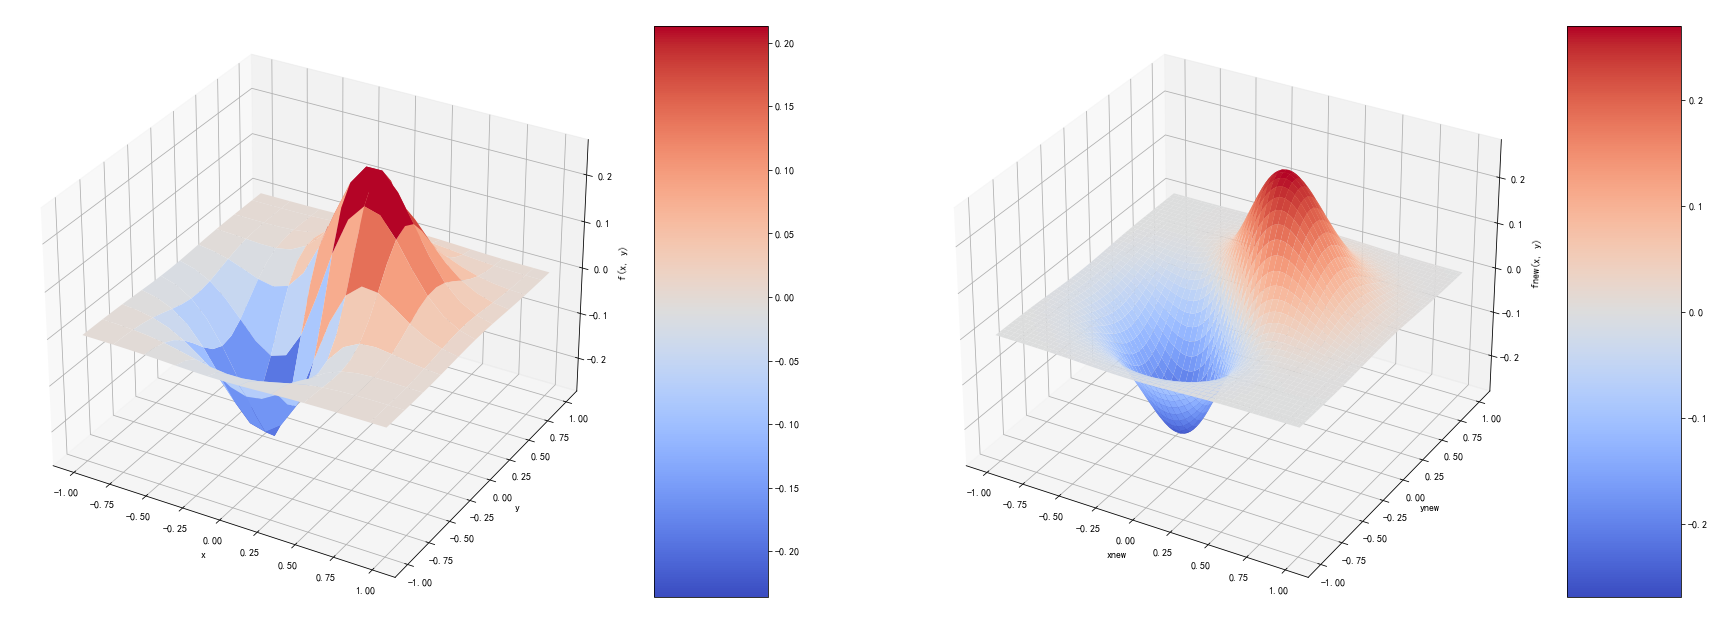

In [9]:

"""
演示三维插值。
"""

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from scipy import interpolate
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def func(x, y):
    return (x+y)*np.exp(-5.0*(x**2 + y**2))

# X-Y轴分为20*20的网格
x = np.linspace(-1, 1, 20)
y = np.linspace(-1,1,20)
x, y = np.meshgrid(x, y)#20*20的网格数据

fvals = func(x,y) # 计算每个网格点上的函数值  15*15的值

fig = plt.figure(figsize=(30, 30))
#Draw sub-graph1
ax=plt.subplot(1, 2, 1,projection = '3d')
surf = ax.plot_surface(x, y, fvals, rstride=2, cstride=2, cmap=cm.coolwarm,linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.colorbar(surf, shrink=0.5, aspect=5)#标注

#二维插值
newfunc = interpolate.interp2d(x, y, fvals, kind='cubic')#newfunc为一个函数

# 计算100*100的网格上的插值
xnew = np.linspace(-1,1,100)#x
ynew = np.linspace(-1,1,100)#y
fnew = newfunc(xnew, ynew)#仅仅是y值   100*100的值  np.shape(fnew) is 100*100
xnew, ynew = np.meshgrid(xnew, ynew)
ax2=plt.subplot(1, 2, 2,projection = '3d')
surf2 = ax2.plot_surface(xnew, ynew, fnew, rstride=2, cstride=2, cmap=cm.coolwarm,linewidth=0.5, antialiased=True)
ax2.set_xlabel('xnew')
ax2.set_ylabel('ynew')
ax2.set_zlabel('fnew(x, y)')
plt.colorbar(surf2, shrink=0.5, aspect=5)#标注

plt.show()


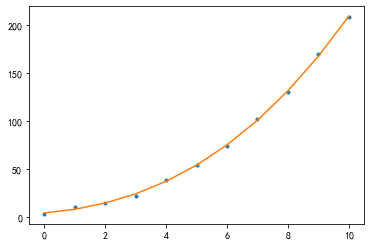

In [12]:

import matplotlib.pyplot as plt
import numpy as np
 
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [2.83, 9.53, 14.52, 21.57, 38.26, 53.92, 73.15, 101.56, 129.54, 169.75, 207.59]
z1 = np.polyfit(x, y, 3) #用3次多项式拟合，输出系数从高到0
p1 = np.poly1d(z1) #使用次数合成多项式
y_pre = p1(x)

plt.plot(x,y,'.')
plt.plot(x,y_pre)
plt.show()


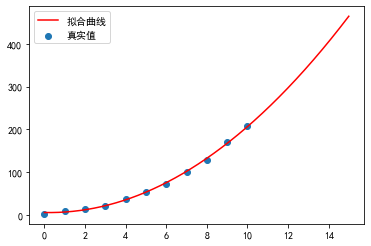

In [6]:
# 导入数据分析模块

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as op

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

# 需要拟合的函数
def f_1(x, A, B, C):
    return A * x**2 + B * x + C

# 需要拟合的数据组
x_group = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y_group = [2.83, 9.53, 14.52, 21.57, 38.26, 53.92, 73.15, 101.56, 129.54, 169.75, 207.59]

# 得到返回的A，B值
A, B, C = op.curve_fit(f_1, x_group, y_group)[0]

# 数据点与原先的进行画图比较
plt.scatter(x_group, y_group, marker='o',label='真实值')
x = np.arange(0, 15, 0.01)
y = A * x**2 + B *x + C
plt.plot(x, y,color='red',label='拟合曲线')
plt.legend() # 显示label

plt.show()


In [7]:
# 构建一个二次函数
def f(x, A, B, C):
    return A * x**2 + B * x + C
#对任意函数进行拟合
op.curve_fit(f, x, y) # 进行拟合


(array([ 2.10635198, -1.02161072,  6.13300699]),
 array([[ 2.55777890e-33, -3.83411053e-32,  9.57249595e-32],
        [-3.83411053e-32,  6.13099777e-31, -1.72247491e-30],
        [ 9.57249595e-32, -1.72247491e-30,  6.45712903e-30]]))